In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline

import os

In [ ]:
# Mount a drive to store the data file (vehicles.csv)
from google.colab import drive
# Mount Google Drive
drive.mount('/content/drive')

# Set the folder name where vehicles.csv is stored
file_path = f'/content/drive/My Drive/Data/vehicles.csv'

# Load the CSV file into a DataFrame
if os.path.exists(file_path):
    df = pd.read_csv(file_path)
    print("File loaded successfully!")
    display(df.head())
else:
    print(f"File not found at: {file_path}\nPlease check the folder name variable.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
File loaded successfully!


,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [ ]:
# Clean up the data

# Change this price limit and examine data plots in the next cell
# Define a price limit for speciality  vehicles ( luxury, heavy duty, calssic)
price_limit = 125000

# Print the initial number of rows
initial_rows = len(df)
print(f"Initial number of rows: {initial_rows}")

# Drop columns 'id' and 'VIN' since their information is captured already in other columns
# use errors='ignore' to avoid errors if the columns are missing or already dropped
df_clean = df.drop(columns=['id', 'VIN'], errors='ignore')

# Remove rows with NaN values
df_clean = df_clean.dropna()

# Print the number of remaining rows
remaining_rows = len(df_clean)
print(f"Number of rows after removing NaNs: {remaining_rows}")
print(f"Rows removed: {initial_rows - remaining_rows}")
display(df_clean.head())

# Filter for non-numeric columns (object type)
non_numeric_cols = df_clean.select_dtypes(include=['object']).columns

print("Number of unique values in non-numeric columns:")
for col in non_numeric_cols:
    # Get the number of unique values
    num_unique = df_clean[col].nunique()
    print(f"{col}: {num_unique}")

# Count rows with price > price_limit
high_price_count = df_clean[df_clean['price'] > price_limit].shape[0]

# Get total rows
total_rows = df_clean.shape[0]

# Calculate percentage
percentage = (high_price_count / total_rows) * 100

print(f"Number of rows with price > ${price_limit}: {high_price_count}")
print(f"Total number of rows: {total_rows}")
print(f"Percentage of high-priced outliers: {percentage:.4f}%")

# divide data between luxury and regular cars
df_clean_special = df_clean[df_clean['price'] > price_limit]
df_clean         = df_clean[df_clean['price'] <= price_limit]
print(f"\nNumber of rows in df_clean (price <= ${price_limit}): {len(df_clean)}")
print(f"\nNumber of rows in df_clean (price >  ${price_limit}): {len(df_clean_special)}")
display(df_clean.head())
display(df_clean_special.head())
print(df_clean.info())

Initial number of rows: 426880
Number of rows after removing NaNs: 79195
Rows removed: 347685


,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
31,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,full-size,truck,black,al
55,auburn,19900,2004.0,ford,f250 super duty,good,8 cylinders,diesel,88000.0,clean,automatic,4wd,full-size,pickup,blue,al
59,auburn,14000,2012.0,honda,odyssey,excellent,6 cylinders,gas,95000.0,clean,automatic,fwd,full-size,mini-van,silver,al
65,auburn,22500,2001.0,ford,f450,good,8 cylinders,diesel,144700.0,clean,manual,rwd,full-size,truck,white,al
73,auburn,15000,2017.0,dodge,charger rt 4dr sedan,excellent,8 cylinders,gas,90000.0,rebuilt,automatic,rwd,mid-size,sedan,grey,al


Number of unique values in non-numeric columns:
region: 403
manufacturer: 41
model: 9529
condition: 6
cylinders: 8
fuel: 5
title_status: 6
transmission: 3
drive: 3
size: 4
type: 13
paint_color: 12
state: 51
Number of rows with price > $125000: 33
Total number of rows: 79195
Percentage of high-priced outliers: 0.0417%

Number of rows in df_clean (price <= $125000): 79162

Number of rows in df_clean (price >  $125000): 33


,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
31,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,full-size,truck,black,al
55,auburn,19900,2004.0,ford,f250 super duty,good,8 cylinders,diesel,88000.0,clean,automatic,4wd,full-size,pickup,blue,al
59,auburn,14000,2012.0,honda,odyssey,excellent,6 cylinders,gas,95000.0,clean,automatic,fwd,full-size,mini-van,silver,al
65,auburn,22500,2001.0,ford,f450,good,8 cylinders,diesel,144700.0,clean,manual,rwd,full-size,truck,white,al
73,auburn,15000,2017.0,dodge,charger rt 4dr sedan,excellent,8 cylinders,gas,90000.0,rebuilt,automatic,rwd,mid-size,sedan,grey,al


,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
2922,huntsville / decatur,140000,2015.0,jeep,renegade,like new,6 cylinders,gas,49658.0,rebuilt,other,fwd,mid-size,SUV,yellow,al
29386,humboldt county,1111111111,1999.0,ford,f350 super duty lariat,good,8 cylinders,diesel,149000.0,clean,automatic,rwd,full-size,pickup,white,ca
40249,monterey bay,135000,2017.0,mercedes-benz,benz,like new,8 cylinders,gas,1758.0,clean,automatic,4wd,full-size,convertible,custom,ca
41657,orange county,150000,1959.0,jaguar,xk 150,excellent,6 cylinders,gas,64765.0,clean,manual,rwd,compact,convertible,white,ca
41722,orange county,128945,2021.0,chevrolet,corvette convertible,new,8 cylinders,gas,19.0,clean,automatic,rwd,compact,convertible,orange,ca


<class 'pandas.core.frame.DataFrame'>
Index: 79162 entries, 31 to 426836
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   region        79162 non-null  object 
 1   price         79162 non-null  int64  
 2   year          79162 non-null  float64
 3   manufacturer  79162 non-null  object 
 4   model         79162 non-null  object 
 5   condition     79162 non-null  object 
 6   cylinders     79162 non-null  object 
 7   fuel          79162 non-null  object 
 8   odometer      79162 non-null  float64
 9   title_status  79162 non-null  object 
 10  transmission  79162 non-null  object 
 11  drive         79162 non-null  object 
 12  size          79162 non-null  object 
 13  type          79162 non-null  object 
 14  paint_color   79162 non-null  object 
 15  state         79162 non-null  object 
dtypes: float64(2), int64(1), object(13)
memory usage: 10.3+ MB
None


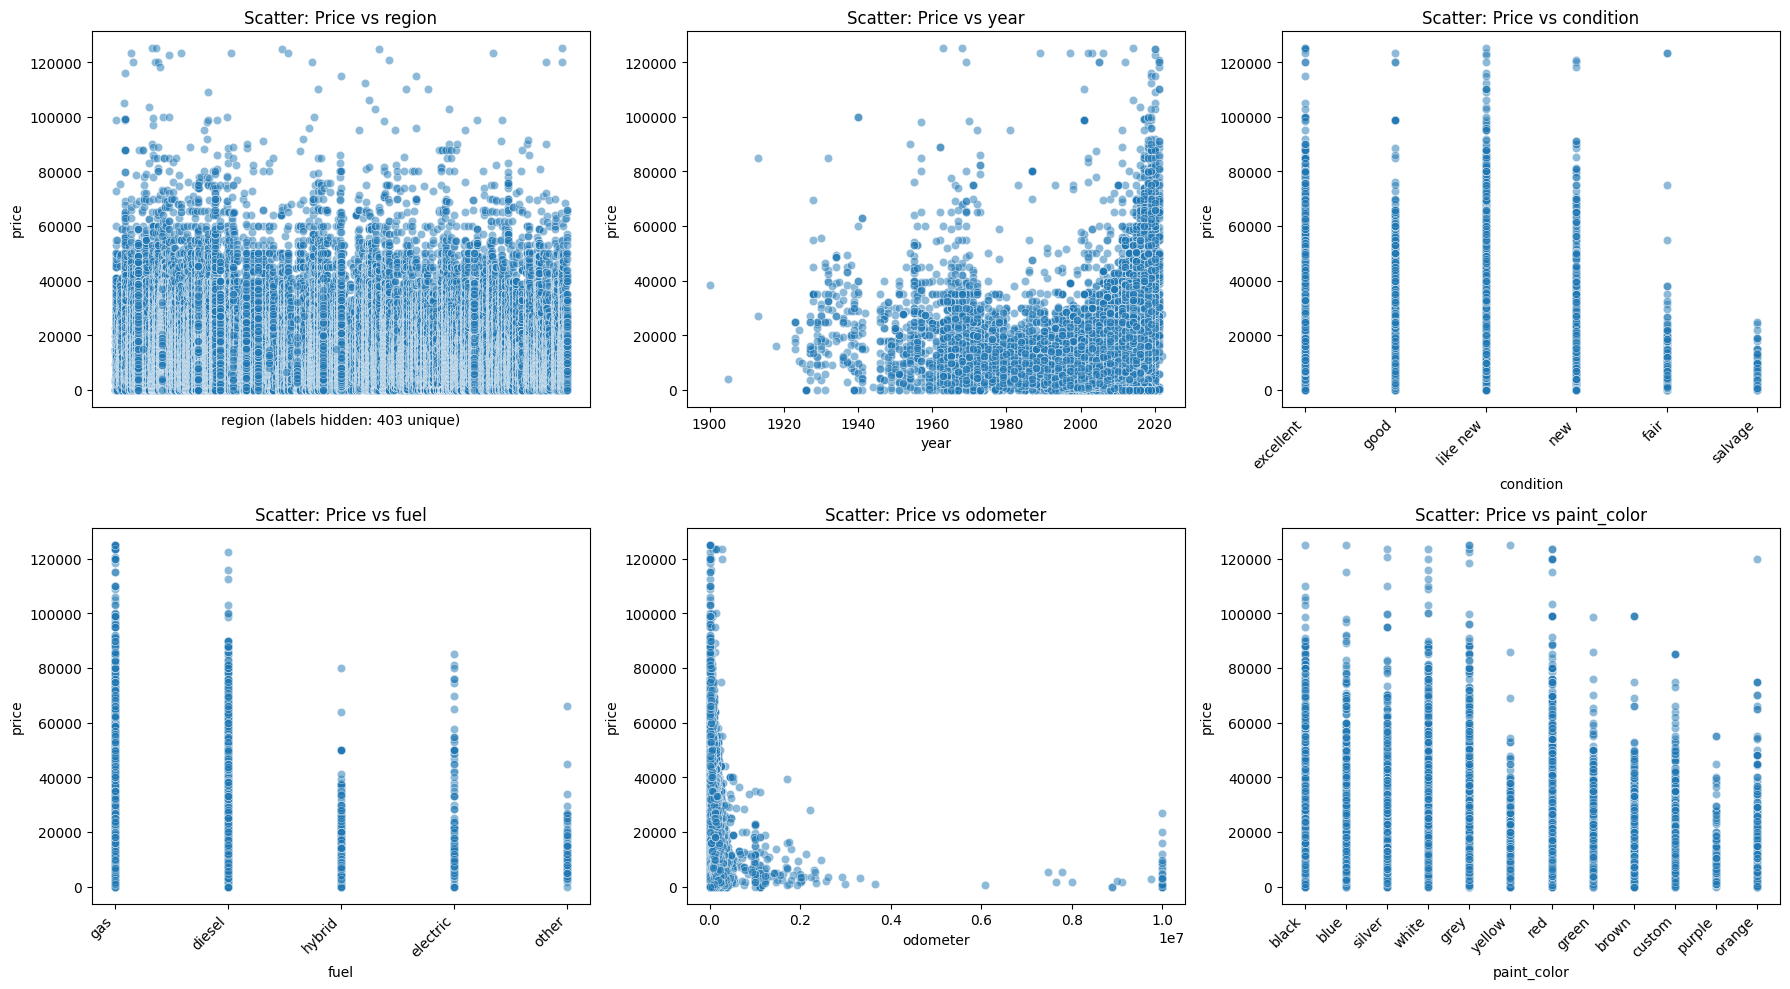

In [ ]:
# Cell to plot data for visual inspection

# Filter features to plot
# We exclude 'price' (target) and 'model' (too many unique values for a meaningful static scatter plot)
features_to_plot = [col for col in df_clean.columns if col not in ['price', 'model', 'state', 'drive', 'manufacturer', 'size', 'transmission', 'type' , 'title_status', 'cylinders']]

# Determine grid size
num_plots = len(features_to_plot)
cols = 3
rows = math.ceil(num_plots / cols)

# ==========================================
# 1. Scatter Plots (Price vs Feature)
# ==========================================
plt.figure(figsize=(18, 5 * rows))
for i, feature in enumerate(features_to_plot):
    plt.subplot(rows, cols, i + 1)
    # Plot scatter
    sns.scatterplot(data=df_clean, x=feature, y='price', alpha=0.5)
    plt.title(f'Scatter: Price vs {feature}')
    # Handle x-axis labels
    if df_clean[feature].dtype == 'object':
        if df_clean[feature].nunique() > 20:
            plt.xticks([])
            plt.xlabel(f"{feature} (labels hidden: {df_clean[feature].nunique()} unique)")
        else:
            plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#Uncomment to see  bar graphs
# ==========================================
# 2. Bar Graphs (Average Price per Feature)
# ==========================================
# Filter for bar/box plots (exclude continuous variables like odometer)
#features_to_plot_bar = [col for col in features_to_plot if col != 'odometer']
#num_plots_bar = len(features_to_plot_bar)
#rows_bar = math.ceil(num_plots_bar / cols)
#plt.figure(figsize=(18, 5 * rows_bar))
#for i, feature in enumerate(features_to_plot_bar):
    #plt.subplot(rows_bar, cols, i + 1)
    # Plot Bar chart (Average Price)
    #sns.barplot(data=df_clean, x=feature, y='price', errorbar=None)
    #plt.title(f'Bar: Avg Price vs {feature}')
    # Handle x-axis labels
    #if df_clean[feature].dtype == 'object' or feature == 'state':
    #    if df_clean[feature].nunique() > 20:
    #         plt.xticks([])
    #         plt.xlabel(f"{feature} (labels hidden: {df_clean[feature].nunique()} unique)")
    #    else:
    #         plt.xticks(rotation=45, ha='right')
    #elif feature == 'year':
    #    if df_clean[feature].nunique() > 20:
    #         plt.xticks([])
    #         plt.xlabel(f"{feature} (labels hidden: {df_clean[feature].nunique()} unique)")
    #    else:
    #         plt.xticks(rotation=45, ha='right')
#plt.tight_layout()
#plt.show()

#Uncomment to see  Box plot
# ==========================================
# 3. Box Plots (Price Distribution per Feature)
# ==========================================
#print("\nGenerating Box Plots...")
#
#plt.figure(figsize=(18, 5 * rows_bar))
#
#for i, feature in enumerate(features_to_plot_bar):
#    plt.subplot(rows_bar, cols, i + 1)
    #sns.boxplot(data=df_clean, x=feature, y='price')
    #plt.title(f'Box: Price vs {feature}')
    # Handle x-axis labels
    #if df_clean[feature].dtype == 'object' or feature == 'state':
    #    if df_clean[feature].nunique() > 20:
    #         plt.xticks([])
    #         plt.xlabel(f"{feature} (labels hidden: {df_clean[feature].nunique()} unique)")
    #    else:
    #         plt.xticks(rotation=45, ha='right')
    #elif feature == 'year':
    #    if df_clean[feature].nunique() > 20:
    #         plt.xticks([])
    #         plt.xlabel(f"{feature} (labels hidden: {df_clean[feature].nunique()} unique)")
    #    else:
    #         plt.xticks(rotation=45, ha='right')
#plt.tight_layout()
#plt.show()

In [ ]:
# Cell to encode features to numeric values
# Many iterations ( try-and-error)  were done to find the best blend between one-hot-coding and coding based on probalbity of a feature
# The output cell lists the type of encoding applied to each column

# Create a new DataFrame for numeric values to preserve original df_clean
df_numeric = df_clean.copy()

# Define features to be one-hot encoded (e.g., if they have low cardinality)
one_hot_encode_features = ['type','condition', 'fuel', 'drive', 'size', 'paint_color']

# Loop through all columns in the DataFrame
for col in df_numeric.columns:
    # Check if the column is of object type (non-numeric)
    if df_numeric[col].dtype == 'object':
        if col in one_hot_encode_features:
            # Perform one-hot encoding for specified features
            print(f"\nApplying one-hot encoding to column '{col}'")
            df_numeric = pd.get_dummies(df_numeric, columns=[col], prefix=col, dtype=int)
        else:
            print(f"\nApplying probability encoding to column '{col}'")
            # Calculate the probability of occurrence for each category
            prob_map = df_numeric[col].value_counts(normalize=True)
            # Map the probabilities to the column
            df_numeric[col] = df_numeric[col].map(prob_map)

            # Create a mapping DataFrame to show the encoding key
            encoding_table = pd.DataFrame({
                'Original Value': prob_map.index,
                'Probability': prob_map.values
            })
            # uncomment to see encoding tables
            # print(f"\nEncoding table for column '{col}':")
            # Display the first 10 rows
            #if len(encoding_table) > 10:
            #    display(encoding_table.head(10))
            #    print(f"... ({len(encoding_table) - 10} more values)")
            #else:
            #    display(encoding_table)

# Display the first few rows of the new numeric dataframe
#print("\nDataframe with non-numeric columns encoded (df_numeric):")
#display(df_numeric.head())

# Show info to confirm data types are now numeric
print(df_numeric.info())


Applying probability encoding to column 'region'

Applying probability encoding to column 'manufacturer'

Applying probability encoding to column 'model'

Applying one-hot encoding to column 'condition'

Applying probability encoding to column 'cylinders'

Applying one-hot encoding to column 'fuel'

Applying probability encoding to column 'title_status'

Applying probability encoding to column 'transmission'

Applying one-hot encoding to column 'drive'

Applying one-hot encoding to column 'size'

Applying one-hot encoding to column 'type'

Applying one-hot encoding to column 'paint_color'

Applying probability encoding to column 'state'
<class 'pandas.core.frame.DataFrame'>
Index: 79162 entries, 31 to 426836
Data columns (total 53 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   region               79162 non-null  float64
 1   price                79162 non-null  int64  
 2   year                 79162 non-null  float6

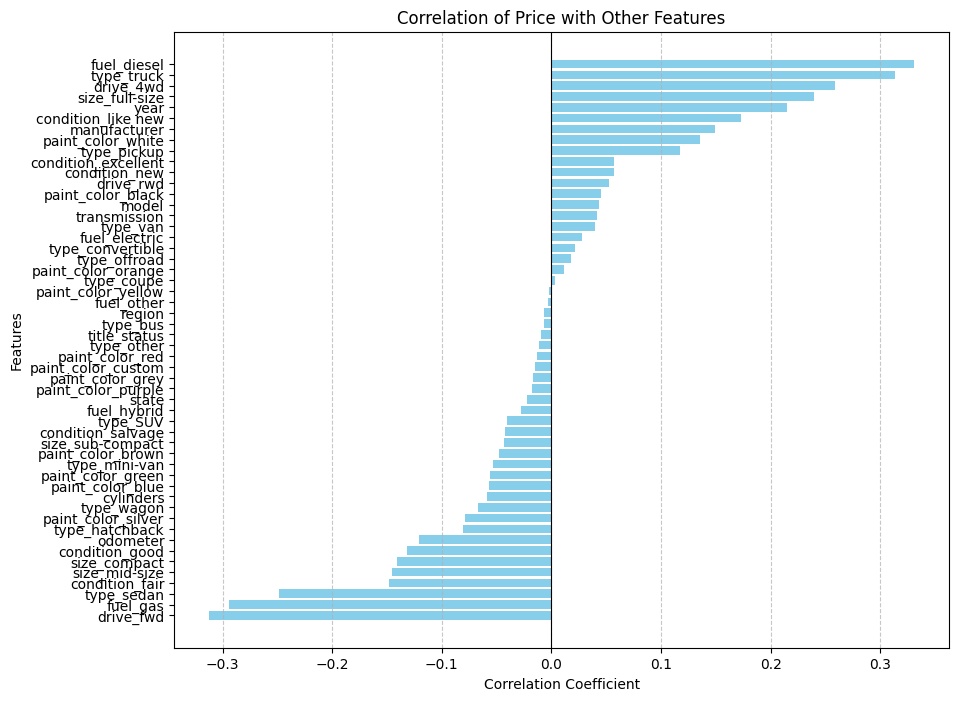

In [ ]:
# First clue on what are most important features based on correlation matrix

# Calculate the correlation matrix
correlation_matrix = df_numeric.corr()

# Get the correlation of 'price' with other features
price_correlation = correlation_matrix['price'].sort_values(ascending=False)


# Drop the 'price' index to remove self-correlation
price_corr_filtered = price_correlation.drop(index='price')

# Create a horizontal bar chart
plt.figure(figsize=(10, 8))
plt.barh(price_corr_filtered.index, price_corr_filtered.values, color='skyblue')

# Set labels and title
plt.title('Correlation of Price with Other Features')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')

# Add a vertical line at 0 for reference and grid lines
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Invert y-axis to show the highest correlation at the top if the series is sorted descending
plt.gca().invert_yaxis()

# Display the plot
plt.show()

Original shape: (79162, 53)
Expanded shape: (79162, 53)
Starting feature selection loop (1 to 10 features)...

Num Features: 1
Selected features: ['fuel_diesel']
MSE: 135246140.94328323

Num Features: 2
Selected features: ['fuel_diesel', 'drive_fwd']
MSE: 125162651.63276415

Num Features: 3
Selected features: ['year', 'fuel_diesel', 'drive_fwd']
MSE: 116383998.45522976

Num Features: 4
Selected features: ['year', 'condition_like new', 'fuel_diesel', 'drive_fwd']
MSE: 112972170.93566932

Num Features: 5
Selected features: ['year', 'condition_like new', 'fuel_diesel', 'drive_fwd', 'type_truck']
MSE: 110298904.58603196

Num Features: 6
Selected features: ['year', 'condition_excellent', 'condition_like new', 'fuel_diesel', 'drive_fwd', 'type_truck']
MSE: 108297028.04096219

Num Features: 7
Selected features: ['year', 'odometer', 'condition_excellent', 'condition_like new', 'fuel_diesel', 'drive_fwd', 'type_truck']
MSE: 106595687.2102955

Num Features: 8
Selected features: ['year', 'odomete

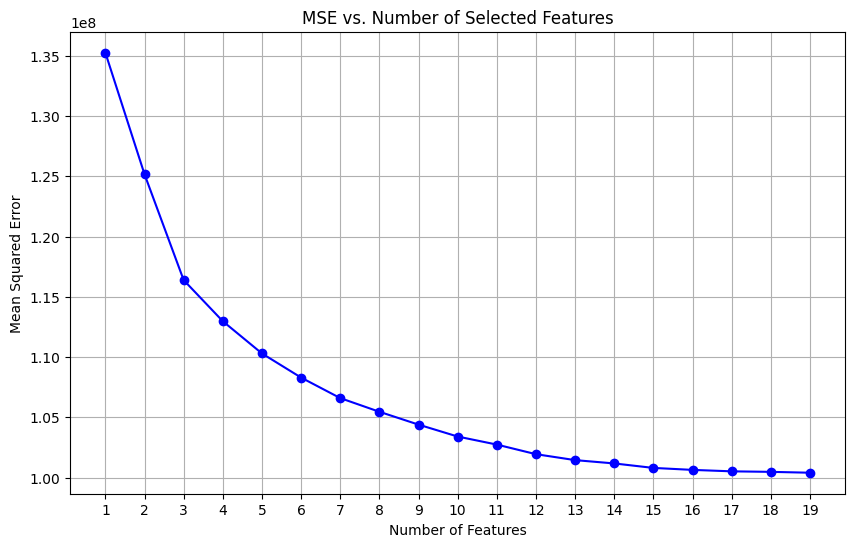


Coefficients of the model with the most features (Sorted by Absolute Value):


,19
model,-144823.866084
fuel_electric,10101.267581
fuel_diesel,9760.841057
type_wagon,-7624.816603
condition_like new,6738.101252
type_sedan,-5731.785021
type_hatchback,-5015.839991
condition_salvage,-4886.893275
condition_fair,-4489.911427
drive_fwd,-4432.523297


In [ ]:
#  Linear Regression

#  Given number of columns are high, runnig this cell even for 2nd order polynomial was slow and thus it was abandoned

# Degrees  for poly expansion of features
Degree_of_Polynomial = 1

# Initialize lists to store results for the for loop on feature count
mse_values = []
coef_list = []
feature_counts = range(1, 20)

# First divide the data between training and test sets
# Create a list of the indices
all_indices = list(range(0, len(df_numeric)))
#print(len(df))
# Set the seed for reproducibility
np.random.seed(42)
# Shuffle the list in-place
np.random.shuffle(all_indices)
# Calculate the split point (90% of data)
split_point = int(len(all_indices) * 0.9)
# Convert list to array and split into train and test indices
train_idx, test_idx = np.split(np.array(all_indices), [split_point])
#print(len(train_idx))
#print(len(test_idx))


# Separate features and target from df_numeric
# 'price' is the target and shouldn't be expanded with itself
X_original = df_numeric.drop(columns=['price'])
y = df_numeric['price']


# Initialize PolynomialFeatures
poly = PolynomialFeatures(degree=Degree_of_Polynomial, include_bias=False)

# Fit and transform the features
X_poly = poly.fit_transform(X_original)

# Get new feature names
feature_names = poly.get_feature_names_out(X_original.columns)

# Create the new DataFrame
df_numeric_expanded = pd.DataFrame(X_poly, columns=feature_names, index=df_numeric.index)

# Add the target 'price' back to the expanded dataframe
df_numeric_expanded['price'] = y

# Display the new shape and first few rows
print(f"Original shape: {df_numeric.shape}")
print(f"Expanded shape: {df_numeric_expanded.shape}")


# Define X (features) and y (target)
X = df_numeric_expanded.drop(columns=['price'])
y = df_numeric_expanded['price']

print("Starting feature selection loop (1 to 10 features)...")

for k in feature_counts:
    # Create the SequentialFeatureSelector object
    selector = SequentialFeatureSelector(
        estimator=LinearRegression(),
        n_features_to_select=k,
        cv=[(train_idx, test_idx)],
        scoring='neg_mean_squared_error'
    )

    # Fit and transform the data
    Xt = selector.fit_transform(X, y)

    # Get selected feature names
    selected_features = X.columns[selector.get_support()].tolist()
    print(f"\nNum Features: {k}")
    print(f"Selected features: {selected_features}")

    # Train the model on the selected features
    lr = LinearRegression().fit(Xt, y)

    # Make predictions
    model_preds = lr.predict(Xt)

    # Calculate MSE
    mse = mean_squared_error(y, model_preds)
    mse_values.append(mse)
    print(f"MSE: {mse}")

    # Store coefficients
    coefs = {'k': k, 'MSE': mse}
    for feature, coef in zip(selected_features, lr.coef_):
        coefs[feature] = coef
    coef_list.append(coefs)

# Plot MSE vs Number of Features
plt.figure(figsize=(10, 6))
plt.plot(feature_counts, mse_values, marker='o', linestyle='-', color='b')
plt.title('MSE vs. Number of Selected Features')
plt.xlabel('Number of Features')
plt.ylabel('Mean Squared Error')
plt.xticks(feature_counts)
plt.grid(True)
plt.show()


# Print the model with most features sorted by absolute descending order
print("\nCoefficients of the model with the most features (Sorted by Absolute Value):")

# Define coef_df from the list populated in the loop
coef_df = pd.DataFrame(coef_list).set_index('k')

max_k = max(feature_counts)
if max_k in coef_df.index:
    # Get the row for the max features, drop MSE, and drop NaNs (unselected features)
    row = coef_df.loc[max_k].drop('MSE', errors='ignore').dropna()

    # Sort by absolute value in descending order
    sorted_row = row.iloc[row.abs().argsort()[::-1]]

    display(sorted_row)

Ridge Coefficients and MSEs for each Alpha (First 5 rows):


,Train MSE,Test MSE,region,year,manufacturer,model,cylinders,odometer,title_status,transmission,...,paint_color_red^2,paint_color_red paint_color_silver,paint_color_red paint_color_white,paint_color_red paint_color_yellow,paint_color_silver^2,paint_color_silver paint_color_white,paint_color_silver paint_color_yellow,paint_color_white^2,paint_color_white paint_color_yellow,paint_color_yellow^2
alpha,,,,,,,,,,,,,,,,,,,,,
0.00001,6.541376e+07,7.534656e+07,-8182.804953,-479545.353321,-10687.851844,-430.248510,-50407.179281,7902.998108,9975.677732,12293.971250,...,5002.067461,0.0,0.0,0.0,7878.015061,0.0,0.0,-3840.491317,0.0,-569.883807
0.00010,6.541376e+07,7.534079e+07,-8182.143278,-479439.146731,-10679.178787,-437.506776,-50387.246997,7900.653308,9971.354009,12282.498524,...,5002.021676,0.0,0.0,0.0,7874.178018,0.0,0.0,-3844.491786,0.0,-568.693605
0.00100,6.541379e+07,7.528691e+07,-8179.302536,-478380.723946,-10599.225239,-508.506648,-50196.428541,7875.328546,9926.559749,12176.304016,...,5015.127097,0.0,0.0,0.0,7846.802438,0.0,0.0,-3871.812713,0.0,-559.240237
0.01000,6.541632e+07,7.481523e+07,-8147.742415,-468151.314283,-9835.760577,-1178.684631,-48369.953493,7627.073284,9488.894103,11154.938548,...,5140.988117,0.0,0.0,0.0,7582.169546,0.0,0.0,-4132.766683,0.0,-468.275028
0.10000,6.556837e+07,7.305226e+07,-7643.287269,-391471.075398,-4656.361948,-5261.314944,-35533.021513,5591.481370,5991.934541,3812.209216,...,5934.719296,0.0,0.0,0.0,5548.156597,0.0,0.0,-5921.613622,0.0,193.058354



Train MSE vs Alpha:
alpha
0.00001          6.541376e+07
0.00010          6.541376e+07
0.00100          6.541379e+07
0.01000          6.541632e+07
0.10000          6.556837e+07
1.00000          6.776413e+07
10.00000         7.385136e+07
100.00000        7.679252e+07
1000.00000       7.813067e+07
10000.00000      8.216208e+07
100000.00000     9.167645e+07
1000000.00000    1.099593e+08
Name: Train MSE, dtype: float64


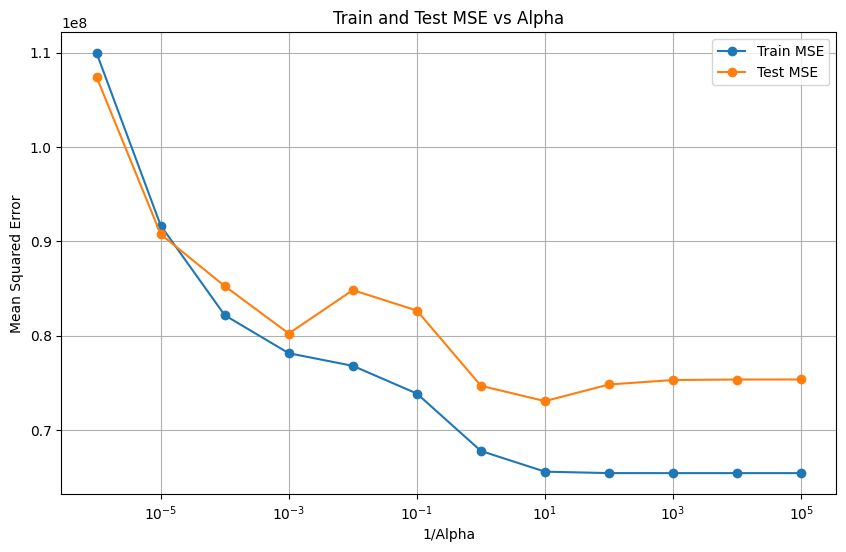


Top  features with largest coefficients for Alpha = 0.1


,Coefficient
year^2,395112.894157
year,-391471.075398
year drive_4wd,159145.257074
year fuel_gas,-126459.601583
year fuel_diesel,120140.041264
year drive_fwd,-103666.732988
year type_wagon,-87247.459435
year type_truck,84607.429097
year drive_rwd,-74374.738285
year paint_color_grey,52894.151789


In [ ]:
# *** Ridge Regression

# polynominal degrees expansion
Polydeg = 2

# Split df_numeric into train_df and test_df
train_df, test_df = train_test_split(df_numeric, test_size=0.3, random_state=42)

# Define X_train and y_train
X_train = train_df.drop(columns=['price'])
y_train = train_df['price']

# Define X_test and y_test
X_test = test_df.drop(columns=['price'])
y_test = test_df['price']

# Initialize list to store results
results_list = []
# Define a list of alpha values
alphas = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000]

for alpha in alphas:
    scaled_pipe = Pipeline([
      ('Polyexpanded', PolynomialFeatures(degree=Polydeg, include_bias=False)),
      ('scaler', StandardScaler()),
      ('ridge', Ridge(alpha=alpha))
    ]).fit(X_train, y_train)

    # Calculate MSEs
    train_preds = scaled_pipe.predict(X_train)
    test_preds = scaled_pipe.predict(X_test)
    train_mse = mean_squared_error(y_train, train_preds)
    test_mse = mean_squared_error(y_test, test_preds)

    # Create a dictionary for this alpha
    res = {'alpha': alpha, 'Train MSE': train_mse, 'Test MSE': test_mse}
    # Add coefficients
    # Access the ridge model inside the pipeline using named_steps
    ridge_model = scaled_pipe.named_steps['ridge']

    # For polynomial features, we need the expanded feature names
    poly = scaled_pipe.named_steps['Polyexpanded']
    feature_names = poly.get_feature_names_out(X_train.columns)

    for feature, coef in zip(feature_names, ridge_model.coef_):
        res[feature] = coef

    results_list.append(res)

# Create a DataFrame
results_df = pd.DataFrame(results_list).set_index('alpha')

# Display the DataFrame head to verify
print("Ridge Coefficients and MSEs for each Alpha (First 5 rows):")
display(results_df.head())

# Print Train MSE vs Alpha
print("\nTrain MSE vs Alpha:")
print(results_df['Train MSE'])

# Plot Train and Test MSE vs Alpha
plt.figure(figsize=(10, 6))
plt.plot(1/results_df.index, results_df['Train MSE'], marker='o', label='Train MSE')
plt.plot(1/results_df.index, results_df['Test MSE'], marker='o', label='Test MSE')
plt.xscale('log')
plt.xlabel('1/Alpha')
plt.ylabel('Mean Squared Error')
plt.title('Train and Test MSE vs Alpha')
plt.legend()
plt.grid(True)
plt.show()

# Analysis for a given alpha
Alpha_test = 0.1
feature_N=20;
print("\nTop  features with largest coefficients for Alpha = 0.1")
# Get the row for alpha = 1000
if Alpha_test in results_df.index:
    row_test = results_df.loc[Alpha_test].drop(['Train MSE', 'Test MSE'])
    # Sort by absolute value to find largest magnitude
    top_features = row_test.abs().sort_values(ascending=False).head(feature_N)
    # Display the original coefficients for these top features as a DataFrame
    top_df = row_test[top_features.index].to_frame(name='Coefficient')
    display(top_df)
else:
    print("Alpha = test not found in results.")

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the pipeline
# Added PolynomialFeatures with degree=2
pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])

# Define the parameter grid
# Searching between 0.02 and 0.05 for alpha
# Fixed the range order: start must be less than stop for a positive step
params_dict = {'ridge__alpha': np.arange(0.02, 0.05, 0.001)}

# Instantiate GridSearchCV
grid = GridSearchCV(pipeline, param_grid=params_dict, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search on the training data
grid.fit(X_train, y_train)

# Get the best parameters and estimator
best_alpha = grid.best_params_['ridge__alpha']
best_model = grid.best_estimator_

print(f"Best Alpha found: {best_alpha}")

# Make predictions using the best model
train_preds = best_model.predict(X_train)
test_preds = best_model.predict(X_test)

# Calculate and print MSE
train_mse = mean_squared_error(y_train, train_preds)
test_mse = mean_squared_error(y_test, test_preds)

print(f"Best Train MSE: {train_mse}")
print(f"Best Test MSE: {test_mse}")

Best Alpha found: 0.04900000000000003
Best Train MSE: 65461868.08389852
Best Test MSE: 73643840.89301519
